In [1]:
import numpy as np
import pandas as pd
from netCDF4 import Dataset
import os
import xarray
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy
import pickle
import datetime
from ll_xy import lonlat_to_xy
import matplotlib.pyplot as plt
import kuka_tools as kt
from scipy.stats import binned_statistic


In [4]:
dir = '../../data/rothera/netcdfs/20230923'

In [5]:
listfiles = os.listdir(dir)
listfiles

ku_files = sorted([f for f in listfiles if 'Ku-Scat' in f])
# ka_files = sorted([f for f in listfiles if 'Ka-Scat' in f])

ku_files

['kuka_stare_decon_Ku-Scat20230923-141334.nc',
 'kuka_stare_decon_Ku-Scat20230923-141542.nc',
 'kuka_stare_decon_Ku-Scat20230923-181628.nc',
 'kuka_stare_decon_Ku-Scat20230923-182128.nc',
 'kuka_stare_decon_Ku-Scat20230923-182628.nc',
 'kuka_stare_decon_Ku-Scat20230923-183129.nc',
 'kuka_stare_decon_Ku-Scat20230923-183629.nc']

Text(0, 0.5, 'y distance (m)')

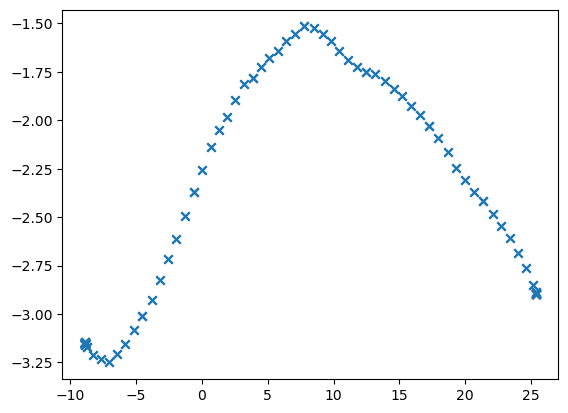

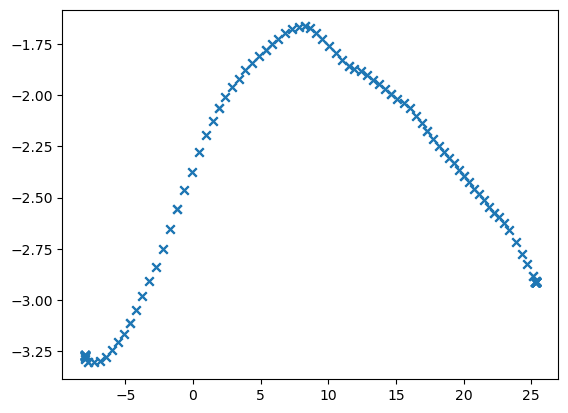

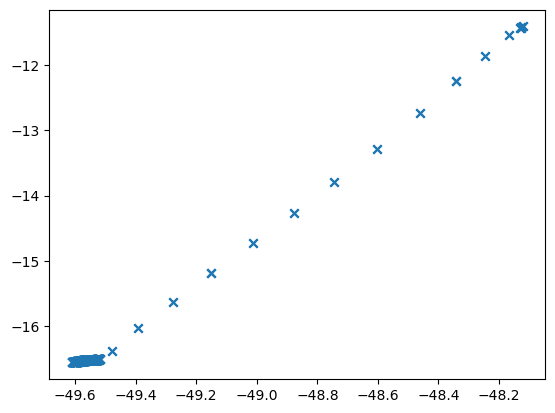

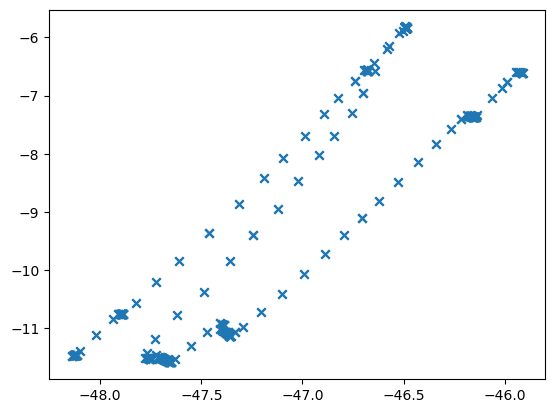

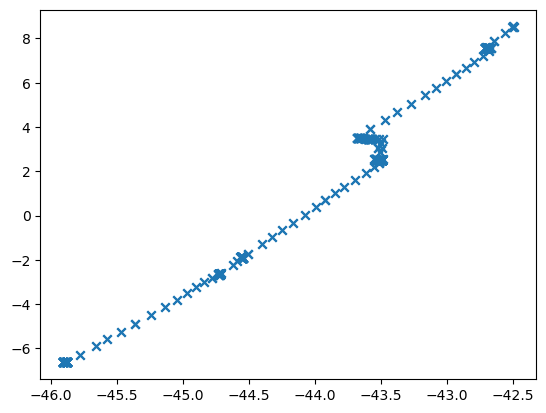

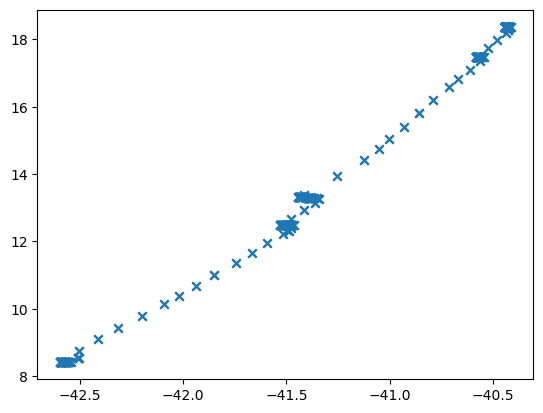

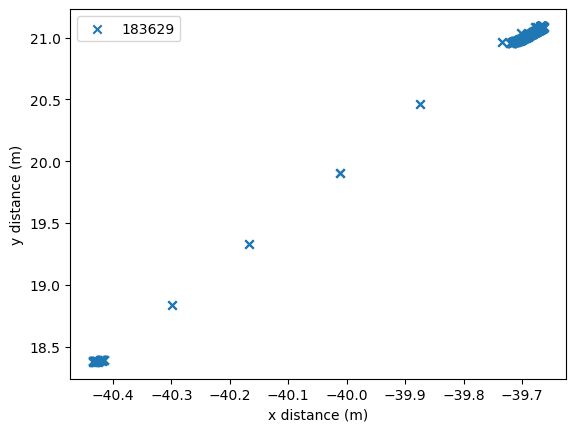

In [6]:
x,y=kt.plot_pos(ku_files[0],dir,plot=False)

x0 = -2300414.994491106; y0 = 923485.871699531

xy_dict = {}

for f in ku_files:

    x,y = kt.plot_pos(f,dir,x0=x0,y0=y0)

    xy_dict[f] = (x,y)
    
plt.legend()
plt.xlabel('x distance (m)')
plt.ylabel('y distance (m)')

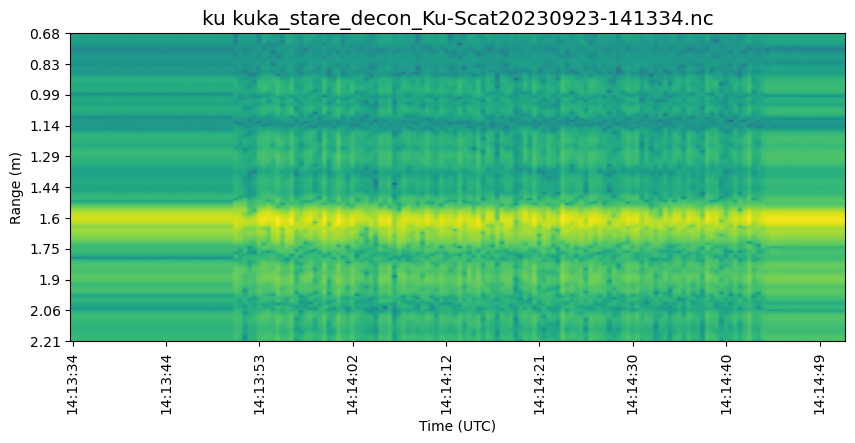

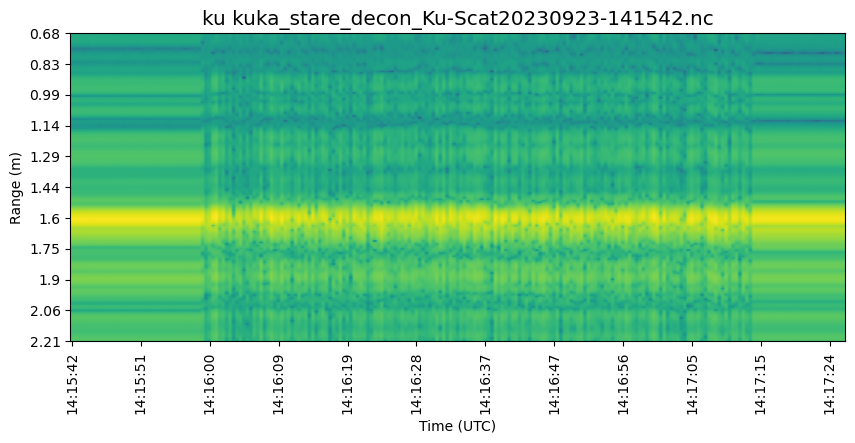

In [7]:
for f in ku_files[0:2]:
    kt.plot_file(f,'ku',dir)

In [8]:
np.argmin(np.abs(x))

np.nanmin(np.abs(x))

39.66314199520275

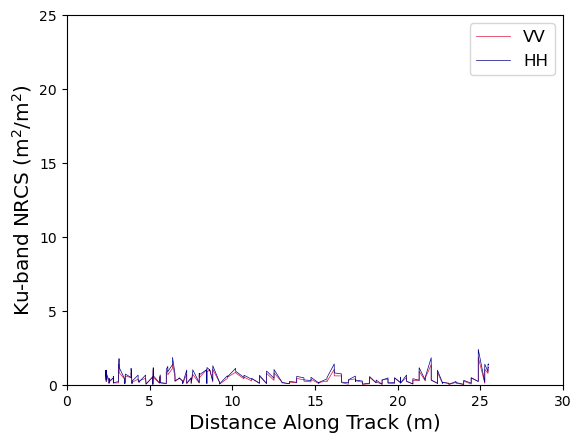

In [10]:
foi = ku_files[1]
x,y=xy_dict[foi]

d = Dataset(f'{dir}/{foi}')

range = np.array(d['range'])

time_offset_s=0
times = np.array([datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(x))+datetime.timedelta(seconds=int(time_offset_s)) for x in d['start_time']])

# mintime = kt.get_time_index(datetime.datetime(2023,9,23,14,13,53),times)
# maxtime = kt.get_time_index(datetime.datetime(2023,9,23,14,14,42),times)
mintime = 0
maxtime=-1


nrcs = pd.DataFrame(kt.get_nrcs(d,'ku'))


x_ = 0; y_ = 0

along_track = np.sqrt((x-x_)**2 + (y-y_)**2)
xdiff = np.diff(x)
ydiff = np.diff(y)
speed = np.sqrt(np.square(xdiff)+np.square(ydiff))
speed=list(speed)+[0]
nrcs['along_track']=along_track
nrcs['speed']=speed


nrcs_return = nrcs.iloc[mintime:maxtime]

nrcs_return = nrcs_return.sort_values('along_track').reset_index()

nrcs_return = nrcs_return[nrcs_return['along_track']<30]

plt.plot(nrcs_return['along_track'],
         nrcs_return['vv'],
         label='VV',
         lw=0.5,
         color='crimson')

plt.plot(nrcs_return['along_track'],
         nrcs_return['hh'],
         label='HH',
         lw=0.5,
         color='darkblue')

plt.ylabel('Ku-band NRCS (m$^2$/m$^2$)',fontsize='x-large')
plt.xlabel('Distance Along Track (m)',fontsize='x-large')



# plt.axvspan(start_along_track,end_along_track,color='grey',alpha=0.2)
plt.ylim(0,25)
plt.xlim(0,30)
plt.legend(fontsize='large')
plt.show()

In [11]:
nrcs

,vv,hv,vh,hh,corr,along_track,speed
0,1.150025,0.004993,0.003159,1.370839,1.000000,25.498980,0.002141
1,1.147699,0.004985,0.003162,1.369193,0.999999,25.497766,0.000000
2,1.149023,0.004986,0.003152,1.370439,1.000000,25.497766,0.005731
3,1.147721,0.004990,0.003163,1.376881,1.000000,25.492598,0.000000
4,1.145821,0.004975,0.003154,1.375418,0.999979,25.492598,0.001133
...,...,...,...,...,...,...,...
220,1.000865,0.007539,0.005060,1.002639,1.000000,8.628644,0.000000
221,1.003121,0.007537,0.005052,0.999490,1.000000,8.628644,0.001870
222,1.003557,0.007526,0.005042,0.999047,1.000000,8.626884,0.000000
223,1.002864,0.007524,0.005046,0.999108,1.000000,8.626884,0.001315


In [15]:
d

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: KuKa combined echo and summary data
    file_processed_with: KuKaPy translated from ProSensing IDL code by Vishnu Nandan with additions by Rosemary Willatt, Thomas Newman and Robbie Mallett
    date_created: 20240131
    data_type: KuKaPy output
    current_calibration_loop_power: 0.005807500385668046
    n_groups: 225
    n_blocks_per_group: 1
    dimensions(sizes): sample(225), range(2048), pol(4)
    variables(dimensions): |S1 polarisation(pol), float64 along_tilt(sample), float64 cross_tilt(sample), float64 start_time(sample), float64 lat(sample), float64 lon(sample), float64 range(range), float64 vv_power_decon0(range, sample), float64 hv_power_decon0(range, sample), float64 vh_power_decon0(range, sample), float64 hh_power_decon0(range, sample), float64 range_peak_signal_decon0(sample), float64 nrcs_decon0(pol, sample), float64 rho_hv_vec_decon0(sample), float64 phase_hv_deg_vec_decon0

In [14]:
nrcs.shape

(225, 7)

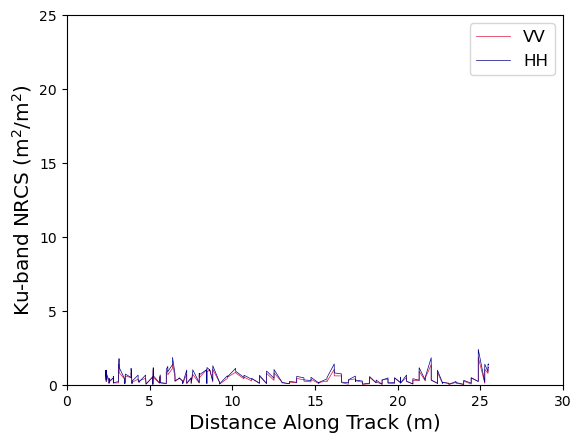

In [19]:
foi = ku_files[1]
x,y=xy_dict[foi]

d = Dataset(f'{dir}/{foi}')

range = np.array(d['range'])

time_offset_s=0
times = np.array([datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(x))+datetime.timedelta(seconds=int(time_offset_s)) for x in d['start_time']])

mintime = 0
maxtime=-1


nrcs = pd.DataFrame(kt.get_nrcs(d,'ku'))
nrcs['xtilt']=np.array(d['cross_tilt'])
nrcs['atilt']=np.array(d['along_tilt'])


x_ = 0; y_ = 0

along_track = np.sqrt((x-x_)**2 + (y-y_)**2)
xdiff = np.diff(x)
ydiff = np.diff(y)
speed = np.sqrt(np.square(xdiff)+np.square(ydiff))
speed=list(speed)+[0]
nrcs['along_track']=along_track
nrcs['speed']=speed


nrcs_return = nrcs.iloc[mintime:maxtime]

nrcs_return = nrcs_return.sort_values('along_track').reset_index()

nrcs_return = nrcs_return[nrcs_return['along_track']<30]

plt.plot(nrcs_return['along_track'],
         nrcs_return['vv'],
         label='VV',
         lw=0.5,
         color='crimson')

plt.plot(nrcs_return['along_track'],
         nrcs_return['hh'],
         label='HH',
         lw=0.5,
         color='darkblue')

plt.ylabel('Ku-band NRCS (m$^2$/m$^2$)',fontsize='x-large')
plt.xlabel('Distance Along Track (m)',fontsize='x-large')



# plt.axvspan(start_along_track,end_along_track,color='grey',alpha=0.2)
plt.ylim(0,25)
plt.xlim(0,30)
plt.legend(fontsize='large')
plt.show()

In [20]:
nrcs_return

,index,vv,hv,vh,hh,corr,xtilt,atilt,along_track,speed
0,160,0.386305,0.000863,0.001310,0.575431,0.982521,-0.418605,0.100245,2.326822,0.000000
1,161,0.831654,0.001873,0.001220,0.959122,0.994155,0.330477,0.287515,2.326822,0.561305
2,163,0.198201,0.000383,0.000609,0.288776,0.941852,-0.132191,0.430722,2.375597,0.556163
3,162,0.688108,0.001872,0.000816,0.983761,0.937041,0.330477,0.287515,2.375597,0.000000
4,158,0.263826,0.002202,0.001512,0.325111,0.905509,-0.209302,-0.020930,2.407148,0.000000
...,...,...,...,...,...,...,...,...,...,...
219,12,1.166330,0.005008,0.003151,1.390270,1.000000,-0.176255,1.256916,25.494739,0.000000
220,11,1.161405,0.004995,0.003141,1.383151,1.000000,0.077111,1.774663,25.494739,0.000000
221,2,1.149023,0.004986,0.003152,1.370439,1.000000,-0.352509,1.565361,25.497766,0.005731
222,1,1.147699,0.004985,0.003162,1.369193,0.999999,-0.352509,1.565361,25.497766,0.000000


0.3960512339197906 0.6636274411365435


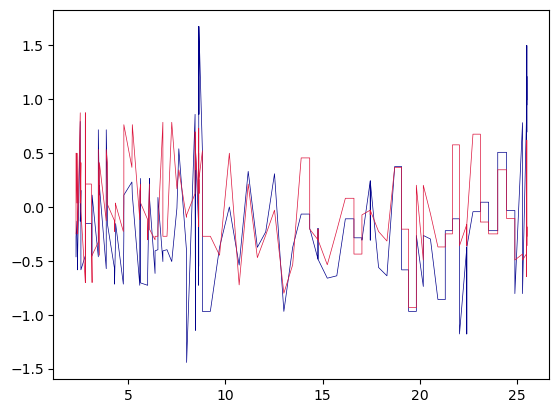

In [25]:
at = nrcs_return['atilt']-np.nanmean(nrcs_return['atilt'])
xt = nrcs_return['xtilt']-np.nanmean(nrcs_return['xtilt'])

plt.plot(nrcs_return['along_track'],
         at,
         label='HH',
         lw=0.5,
         color='darkblue')

plt.plot(nrcs_return['along_track'],
         xt,
         label='HH',
         lw=0.5,
         color='crimson')

print(np.nanstd(xt),np.nanstd(at))

In [11]:
pickle.dump(nrcs_return,open('../../data/pickles/NRCS_923_KU.p','wb'))



In [9]:
import pickle
pickle_file = '../data/pickles/923_trans.p'
pickle.dump( (along_track,nrcs), open(pickle_file,'wb'))

plt.plot(along_track[mintime:maxtime],nrcs['vv'][mintime:maxtime])
bs = binned_statistic(along_track[mintime:maxtime],nrcs['vv'][mintime:maxtime],
                      statistic='mean',bins=np.arange(0,26.1,0.5))

plt.ylabel('NRCS',fontsize='x-large')
plt.xlabel('Distance Along Track (mW)',fontsize='x-large')
# plt.ylim(0,25)
# plt.xlim(0,30)

plt.show()

bin_centres = np.arange(0.25,26.01,0.5)

plt.plot(bin_centres,bs[0])

thresh=25

mean = np.nanmean(bs[0][bin_centres<thresh])

plt.plot([0,thresh],[mean,mean],color='k',ls='--')

print(mean)

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../data/pickles/923_trans.p'